In [1]:
import pandas as pd

data=pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
hourly_data=data.resample('H').sum()
hourly_data

,Ativa
Data,
2018-04-22 00:00:00,642.96
2018-04-22 01:00:00,643.68
2018-04-22 02:00:00,637.20
2018-04-22 03:00:00,632.88
2018-04-22 04:00:00,629.28
...,...
2020-02-15 19:00:00,727.92
2020-02-15 20:00:00,720.72
2020-02-15 21:00:00,710.64


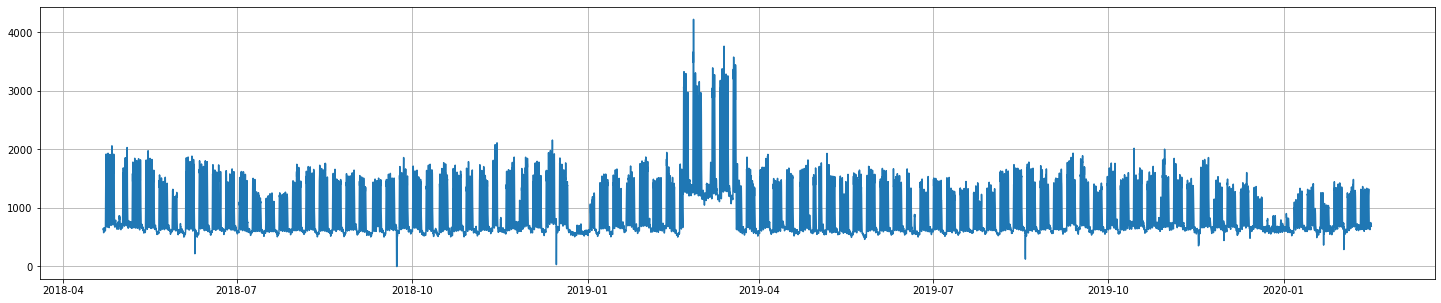

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))
plt.plot(hourly_data)
plt.grid()